# SETUP

In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../fusion'))
module_path2 = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

if module_path2 not in sys.path:
    sys.path.append(module_path2)

# Setup Infersent

In [2]:
from embedding_algorithms.inferSent import set_RNN_embedding
start = time.time()
params = {}

model_type = "bilstm" 
char_level = False
model_version = 2
rnn_dim = 1024
verbose = 1
set_RNN_embedding(model_type, char_level, model_version, rnn_dim, verbose)
print("TIME: {0}".format(time.time() - start))

params['embedding'] = {
    'name': 'Infersent',
    'model_type': model_type,
    'char_level': char_level,
    'model_version': model_version,
    'rnn_dim': rnn_dim,
    'verbose': verbose
}

Vocab size : 2196017
TIME: 171.68150091171265


# Import dataset

In [3]:
from preprocessing_datasets.preprocessing_book import *
data = set_clean_book()
data

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
0,0,0000219118,ground-zero-books%2c-ltd-silver-spring/62893/sf,history-books,"['Association for Asian Studies, Inc']","['association for asian studies, inc']",asian association for inc studies,"The Journal of Asian Studies, Volume 47, Numbe..."
1,1,0000219118,pursuit-of-happiness-books-oakland-ca/81375/sf,history-books,"['The Association for Asian Studies, Inc']","['the association for asian studies, inc']",asian association for inc studies the,The Journal of Asian Studies
2,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",c d mildenhall,Late Oligocene - Early Miocene Spores and Poll...
3,2,0000788589,archway-books-mana/685127/sf,science-books,"['Pocknall, D. T. And D. C. Mildenhall', 'Pock...","['pocknall, d. t.', 'd. c. mildenhall']",d pocknall t,Late Oligocene - Early Miocene Spores and Poll...
4,3,0000788589,arty-bees-books-wellington/6226172/sf,science-books,"['Buckeridge, John Stewart']","['buckeridge, john stewart']",buckeridge john stewart,Fossil Barnacles (Cirripedia: Thoracica) of Ne...
...,...,...,...,...,...,...,...,...
2199026,1891013,9994533150,mark-henderson-olathe-ks-u.s.a/2095040/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199027,1891014,9994533150,owlsbooks-toledo-md-u.s.a/51218811/sf,literature,['Clara Lee Tanner'],['clara lee tanner'],clara lee tanner,Indian Arts and Crafts
2199028,1891015,9994533150,second-city-books-aurora-il-u.s.a/63477172/sf,literature,"['Tanner, Clara Lee']","['tanner, clara lee']",clara lee tanner,Indian Arts and Crafts
2199029,1891016,9998111552,dogstar-books-lancaster-pa-u.s.a/50869000/sf,history-books,"['Nixon, Richard M.']","['nixon, richard m.']",m nixon richard,RN; The Memoirs of Richard Nixon


## CASE1 

In [56]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0810932776')

In [57]:
table_ISBN

,index,ISBN_10,seller_link,big_cate,author,dirtyAuthor,oldAuthor,title
1605039,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",igor lysenko,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605040,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",atonina bouis w,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605041,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",egorov georgy,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605042,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",marian schwartz,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605043,1387669,0810932776,aamstar-bookshop-hooked-books-colorado-springs...,biographies,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",petrov vadim,"The Escape of Alexei, Son of Tsar Nicholas II:..."
...,...,...,...,...,...,...,...,...
1605965,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",igor lysenko,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605966,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",atonina bouis w,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605967,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",egorov georgy,"The Escape of Alexei, Son of Tsar Nicholas II:..."
1605968,1387926,0810932776,your-online-bookstore-houston-tx-u.s.a/5560409...,science-books,"['Lysenko, Igor; Egorov, Georgy; Petrov, Vadim...","['lysenko, igor', 'egorov, georgy', 'petrov, v...",marian schwartz,"The Escape of Alexei, Son of Tsar Nicholas II:..."


In [58]:
table_ISBN['oldAuthor'].value_counts() #first 5

petrov vadim                     213
egorov georgy                    177
igor lysenko                     145
marian schwartz                   81
atonina bouis w                   77
b egorov g                        32
petrov v                          30
i lysenko v                       26
b egorov georgy                   24
igor lysenko v                    22
abrams harry n                    22
petrov vadim vadimovich           20
igor lysenho                      20
igor lysenki                      12
igor lysenkho                      2
petrov vaoim                       2
egoroy georgy                      2
others                             2
antonina bovis                     2
lysenho                            2
egorov                             2
petrov                             2
lysenko                            2
igor lyseno                        2
perov vadim                        2
english from russian to trans      2
petrov yadim                       2
e

In [59]:
column = table_ISBN['oldAuthor'].tolist()

In [60]:
import random
def random_color(n):
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    r += step
    g += step
    b += step
    r = int(r) % 256
    g = int(g) % 256
    b = int(b) % 256
    return r,g,b

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

In [61]:
from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['oldAuthor','title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['oldAuthor', 'title']


In [62]:
from sklearn.decomposition import PCA


pca_model = PCA(n_components=2, random_state=88)

pca_embeddings = pca_model.fit_transform(embeddings_tokens)


params['reduction'] = {
    'name': 'PCA',
    'num_components': 2,
    'verbose': 1,
}

rows: 931
classes: 931


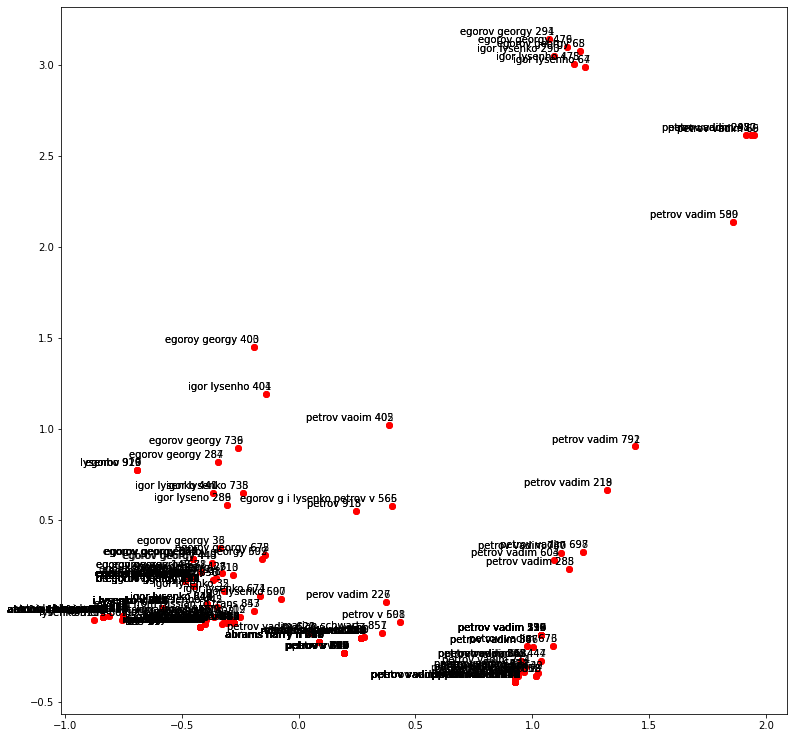

In [63]:
x = []
y = []
for emb in pca_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [64]:
from dimensionality_reduction_algorithms.pca import pca_dim_reduction
from sklearn.decomposition import PCA


pca_model = PCA(n_components=3, random_state=88)

pca_embeddings = pca_model.fit_transform(embeddings_tokens)


params['reduction'] = {
    'name': 'PCA',
    'num_components': 2,
    'verbose': 1,
}

rows: 931
classes: 931


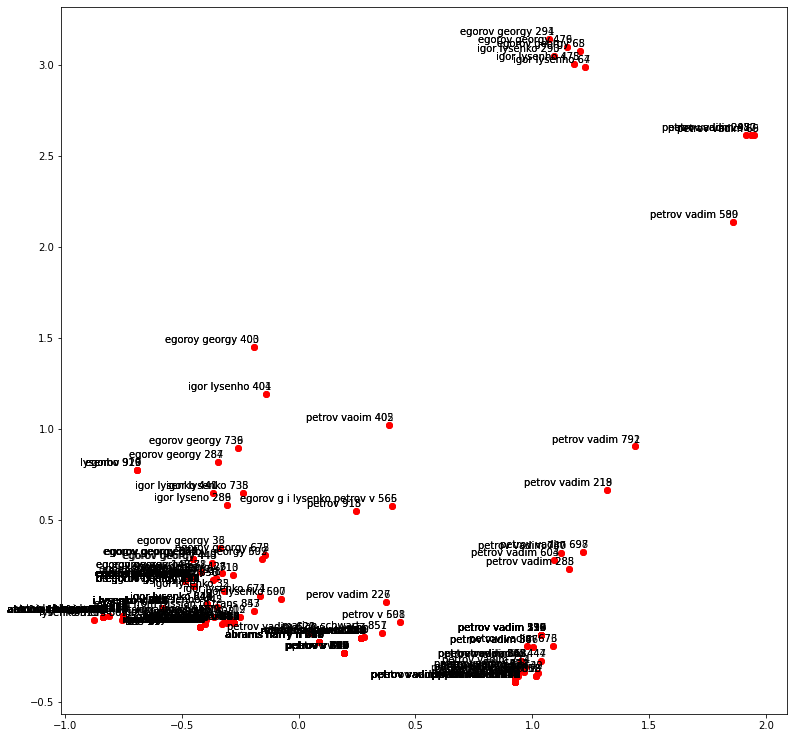

In [65]:
x = []
y = []
for emb in pca_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [66]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(pca_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

clustering with NUM_CLUSTERS = 5, 


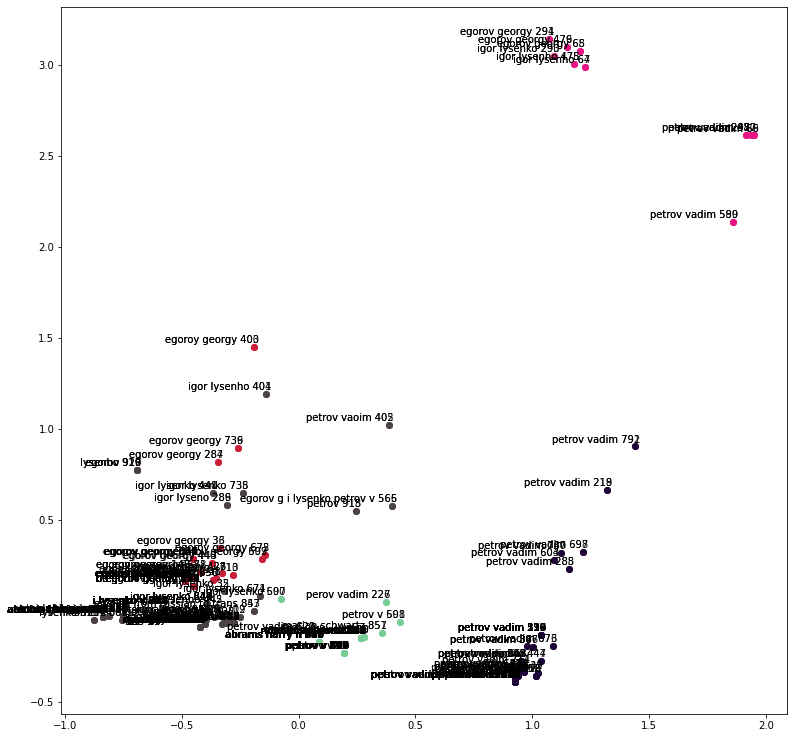

In [67]:
x_blocks = []
y_blocks = []
for emb in pca_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

In [71]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
        perplexity=10, 
        n_components=2, 
        method='barnes_hut',
        early_exaggeration=12,
        init='pca', 
        n_iter=2500, 
        random_state=23
    )


tsne_embeddings = tsne_model.fit_transform(embeddings_tokens)

params['reduction'] = {
    'name': 'TSNE',
    'num_components': 2,
    'early_exaggeration': 12,
    'verbose': 1,
    'perplexity': 10,
    'method': "barnes_hut"
}

rows: 931
classes: 931


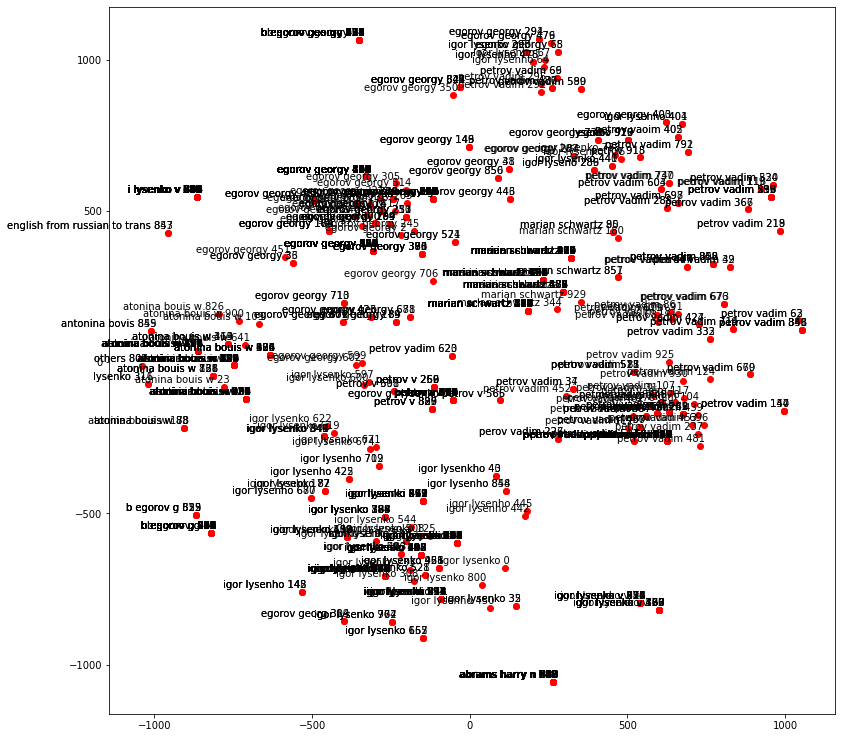

In [72]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [75]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
        perplexity=30, 
        n_components=2, 
        method='barnes_hut',
        early_exaggeration=12,
        init='pca', 
        n_iter=2500, 
        random_state=23
    )


tsne_embeddings = tsne_model.fit_transform(embeddings_tokens)

rows: 931
classes: 931


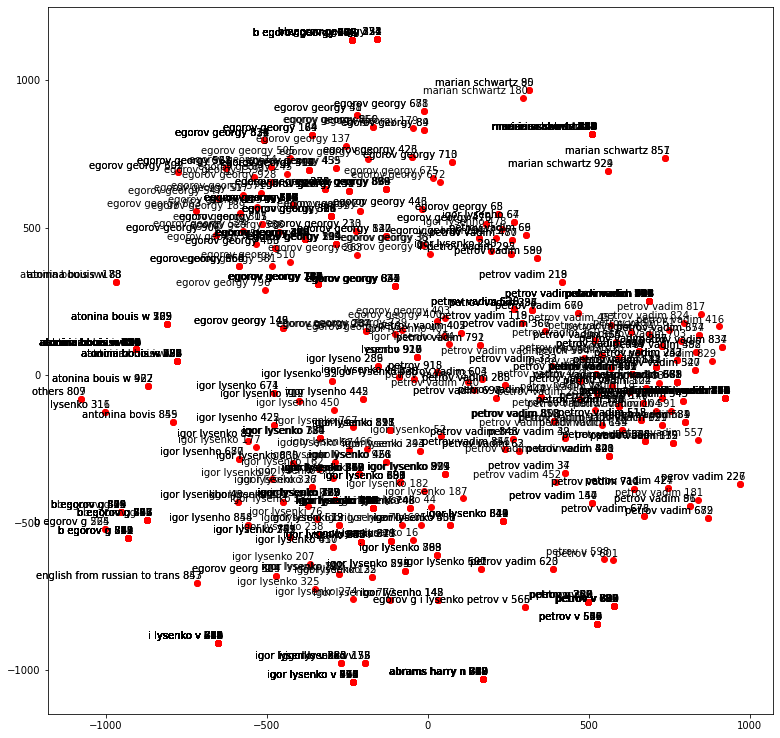

In [76]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [83]:
from sklearn.manifold import TSNE

tsne_model = TSNE(
        perplexity=40, 
        n_components=2, 
        method='barnes_hut',
        early_exaggeration=2,
        init='pca', 
        n_iter=2500, 
        random_state=23
    )


tsne_embeddings = tsne_model.fit_transform(embeddings_tokens)

rows: 931
classes: 931


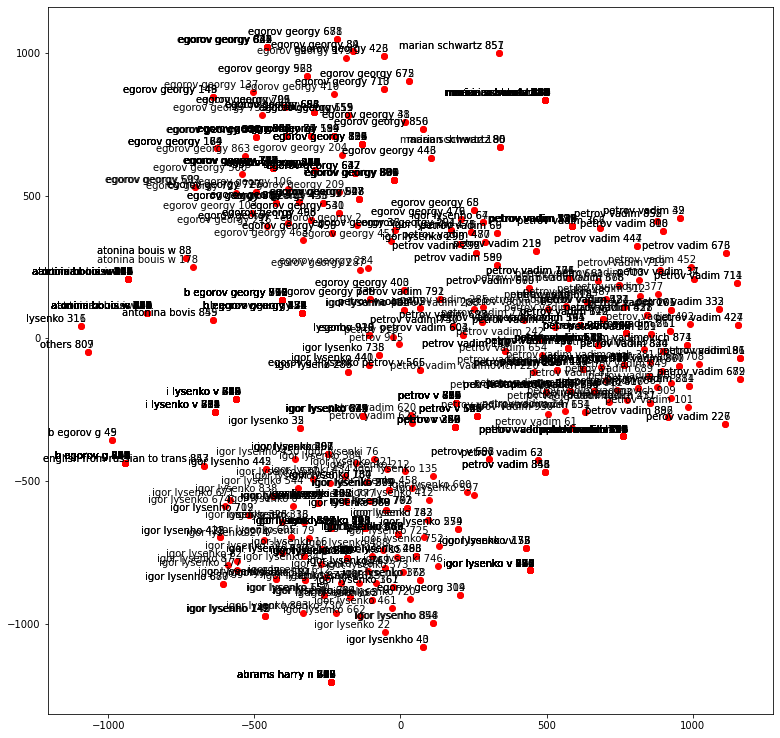

In [84]:
x = []
y = []
for emb in tsne_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

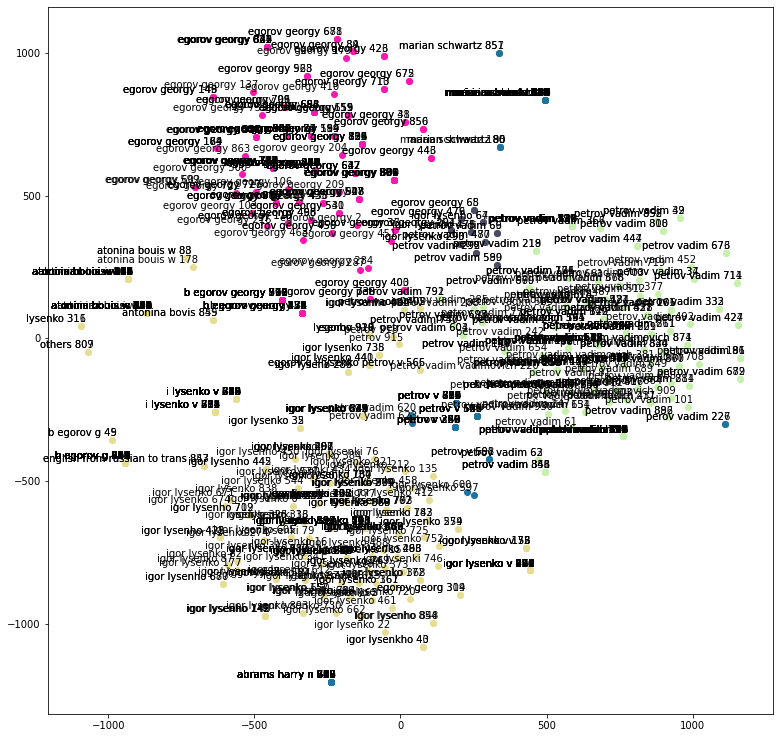

In [86]:
x_blocks = []
y_blocks = []
for emb in tsne_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

## CASE2 

In [40]:
ISBN_10_groups = data.groupby('ISBN_10')
table_ISBN = ISBN_10_groups.get_group('0060852569')
table_ISBN['oldAuthor'].value_counts() # first three | not barbara

barbara kingsolver     289
camille kingsolver     233
hopp l steven          232
a houser richard         7
kingsolver               5
barbara hopp             3
camille                  3
harper perennial         3
hopp steven              3
kingsolver l steven      3
barbara kingslover       3
l                        3
l steven                 3
camille kin              2
Name: oldAuthor, dtype: int64

In [41]:
column = table_ISBN['oldAuthor'].tolist()

from embedding_algorithms.inferSent import RNN_embedding
attr_list = ['oldAuthor', 'title']
params['attr_list'] = attr_list
embeddings_tokens = RNN_embedding(table_ISBN, attr_list, model_type, char_level)
embeddings_tokens = np.array(embeddings_tokens)

attrs: ['oldAuthor', 'title']


rows: 792
classes: 792


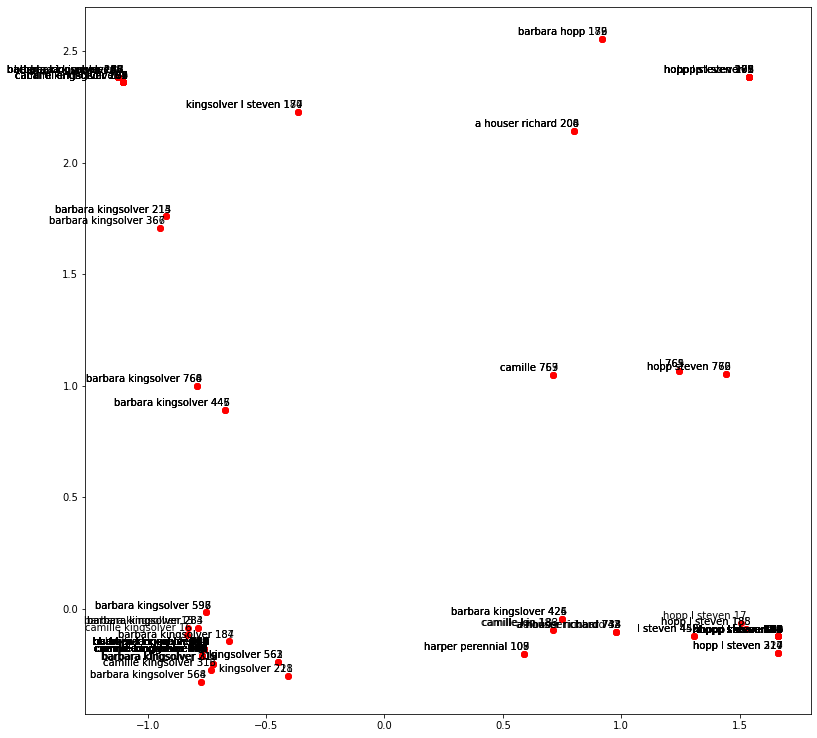

In [42]:
from sklearn.decomposition import PCA


pca_model = PCA(n_components=3, random_state=88)

pca_embeddings = pca_model.fit_transform(embeddings_tokens)


params['reduction'] = {
    'name': 'PCA',
    'num_components': 2,
    'verbose': 1,
}

x = []
y = []
for emb in pca_embeddings:
    x.append(emb[0])
    y.append(emb[1])

print("rows: {0}".format(len(x)))
print("classes: {0}".format(len(y)))

plt.figure(figsize=(13, 13)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i],c='red')
    plt.annotate(column[i] + ' ' + str(i),
            xy=(x[i], y[i]),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
plt.show()

In [43]:
from cluster_algorithms.hierarchy_cluster import hierarchy_cluster
num_clusters = 5
blocks = hierarchy_cluster(pca_embeddings, {'num_clusters': num_clusters})

params['blocking'] = {
    'name': 'hierarchy',
    'num_clusters': num_clusters
}

print(blocks)
print()
for index in blocks:
    print("index: {0} - {1}".format(index, len(blocks[index])))

clustering with NUM_CLUSTERS = 5, 
{1: [0, 1, 3, 4, 6, 7, 87, 88, 145, 146, 165, 166, 168, 169, 171, 172, 174, 175, 177, 178, 180, 181, 198, 199, 202, 203, 206, 207, 213, 214, 215, 366, 367], 4: [2, 5, 8, 167, 170, 173, 176, 179, 182, 200, 201, 204, 205, 208, 209], 2: [9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 46, 47, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 89, 92, 95, 98, 101, 104, 110, 113, 116, 119, 122, 125, 128, 131, 134, 135, 136, 139, 142, 147, 150, 153, 156, 159, 162, 184, 187, 189, 192, 195, 210, 211, 212, 216, 218, 219, 221, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 283, 284, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 334, 335, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 368, 371, 374, 377, 380, 383, 386, 389, 392, 395, 398, 401, 404, 407, 410, 413, 416, 417, 418, 421, 427, 428, 429, 430, 433, 436, 439, 441, 443, 445, 446, 447, 448, 451, 454, 457

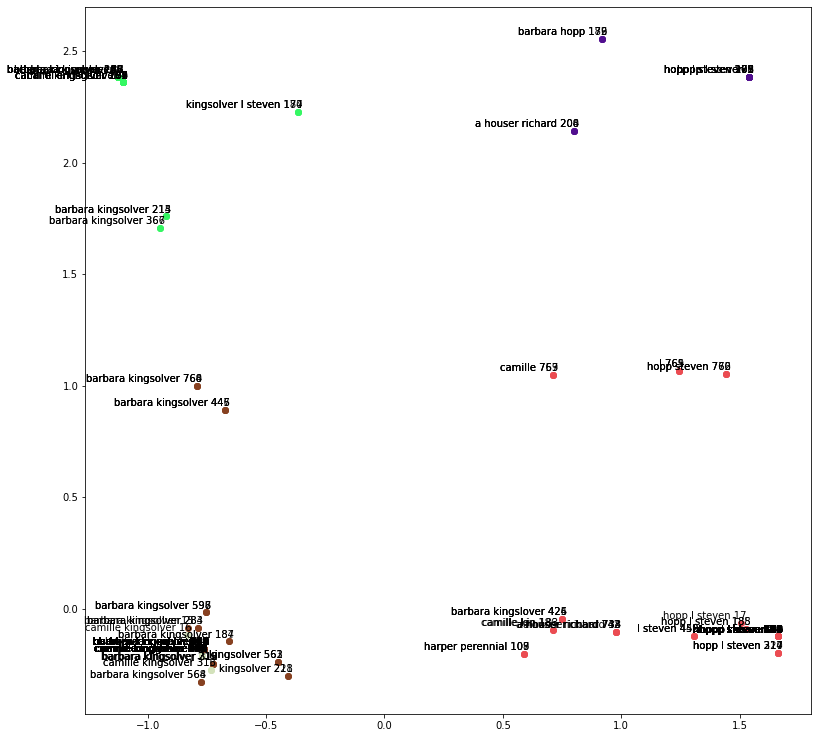

In [47]:
x_blocks = []
y_blocks = []
for emb in pca_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 

for i in range(num_clusters):
    colorInit = 1 + i + 3
    r, g, b = random_color(colorInit)
    selected_color = rgb2hex(r,g,b)
    block = blocks[i]
    for e in block:
        plt.scatter(x[e],y[e], c=selected_color)
        plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()

33


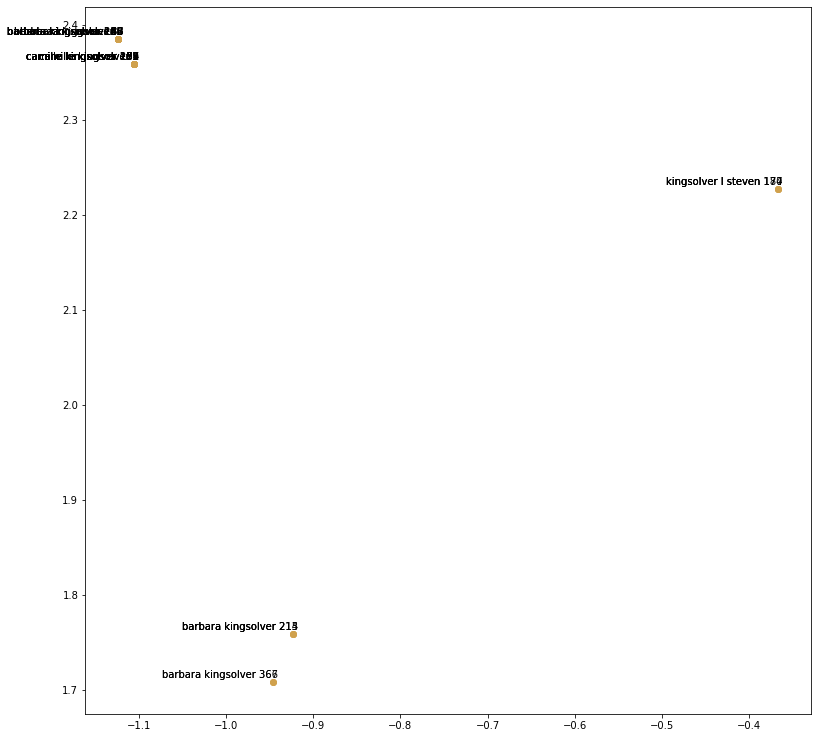

In [55]:
x_blocks = []
y_blocks = []
for emb in pca_embeddings:
    x_blocks.append(emb[0])
    y_blocks.append(emb[1])
plt.figure(figsize=(13, 13)) 


r, g, b = random_color(colorInit)
selected_color = rgb2hex(r,g,b)
block = blocks[1]
print(len(block))
for e in block:
    plt.scatter(x[e],y[e], c=selected_color)
    plt.annotate(column[e] + ' ' + str(e),
                     xy=(x[e], y[e]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.show()